In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

In [21]:
df = pd.read_csv("data/df_meam_params.csv", index_col=0)
df = df.set_index(["model","species"])
# get list of meam params
param_list = df.columns.to_list()[0:37]
df = df.reset_index()
print(param_list)

['elt', 'lat', 'z', 'ielement', 'atwt', 'alpha', 'b0', 'b1', 'b2', 'b3', 'alat', 'esub', 'asub', 't0', 't1', 't2', 't3', 'rozero', 'ibar', 'rc', 'delr', 'rho0', 'augt1', 'erose_form', 'ialloy', 'zbl', 'nn2', 'attrac', 'repuls', 'Cmin', 'Cmax', 'Ec', 're', 'mixture_ref_t', 'emb_lin_neg', 'bkgd_dyn', 'fcut_form']


In [22]:
df.groupby('lat')['lat'].count()

lat
bcc     73
dia     21
dim     15
fcc    100
hcp     51
Name: lat, dtype: int64

In [23]:
# property list to explore
prop_list = ['lattice_constant_fcc', 'bulk_modulus_fcc',
            'c44_fcc', 'c12_fcc', 'c11_fcc',
            'cohesive_energy_fcc'
]

In [24]:
def correlation_df(df):#, label_dict):
    df_corr = df.corr(numeric_only = True).round(2)
    columns = df_corr.columns.to_list()
    #columns = [label_dict[x] for x in columns]
    df_corr.columns = columns
    
    df_index = df_corr.index.to_list()
    #df_index = [label_dict[x] for x in df_index]
    df_corr.index = df_index

    #order = df_corr['Strength MPa'].sort_values(ascending=False).index.to_list()
    #df_corr = df_corr[order].reindex(order)
    return df_corr

df_corr = correlation_df(df[prop_list+param_list])

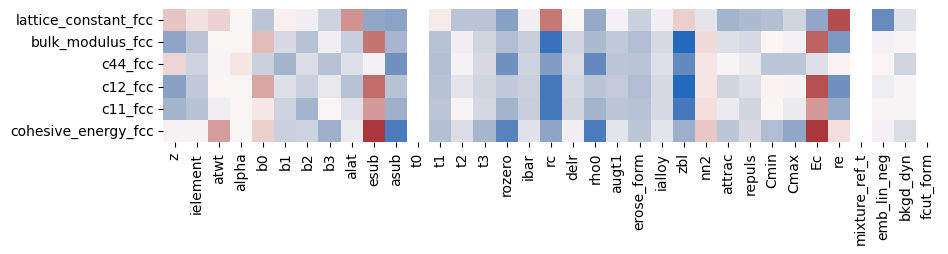

In [25]:
colors = sns.color_palette("vlag", as_cmap=True)
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_corr.loc[prop_list][[i for i in df_corr.columns if i not in prop_list]], 
            cmap=colors,
            square = True,
            cbar = False
            )
